In [1]:
# Suprimir advertencias de bibliotecas
import warnings
warnings.filterwarnings('ignore')

# Bibliotecas para manejo de datos
import pandas as pd
import numpy as np
import random

# Bibliotecas para visualización
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_venn as venn

# Bibliotecas de sklearn para modelado y métricas
from sklearn import model_selection, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, ConfusionMatrixDisplay, 
                             log_loss, precision_score, recall_score, f1_score, 
                             roc_auc_score, roc_curve)

# Biblioteca para pruebas estadísticas
from scipy.stats import kstest, norm



Matriz de confusion

[[13  0  0]
 [ 0 17  2]
 [ 0  0 18]]


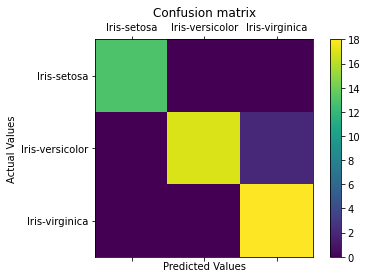

In [2]:
#ignore warnings
warnings.filterwarnings('ignore')
# Load digits dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url)
# df = df.values
X = df.iloc[:,0:4]
y = df.iloc[:,4]
#test size
test_size = 0.33
#generate the same set of random numbers
seed = 7
#Split data into train and test set. 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
#Train Model
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

#Construct the Confusion Matrix
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
cm = confusion_matrix(y_test, pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

Exactitud del modelo

Accuracy - val set: 96.67% (0.05)
Accuracy - test set: 92.00%


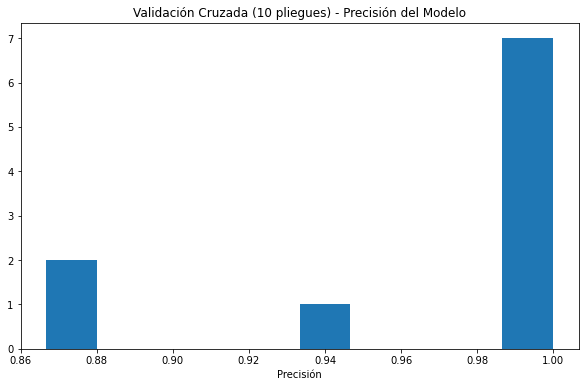

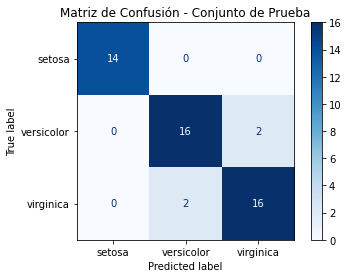

In [3]:
# #import modules
# import warnings
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn import model_selection
# from sklearn.linear_model import LogisticRegression
# from sklearn import datasets
# from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

#ignore warnings
warnings.filterwarnings('ignore')  # Ignora las advertencias para mantener el resultado más limpio

# Load iris dataset
iris = datasets.load_iris()  # Carga el conjunto de datos Iris

# Create feature matrix
X = iris.data  # Crea la matriz de características (datos de entrada)

# Create target vector
y = iris.target  # Crea el vector de destino (etiquetas de clase)

# Test size
test_size = 0.33  # Tamaño del conjunto de prueba (33% de los datos se utilizarán para pruebas)

# Generate the same set of random numbers
seed = 7  # Semilla para generar números aleatorios, asegura la reproducibilidad de los resultados

# Cross-validation settings with shuffle=True
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)  # Configuración de validación cruzada con mezcla aleatoria de datos

# Model instance
model = LogisticRegression()  # Crea una instancia del modelo de regresión logística

# Evaluate model performance
scoring = 'accuracy'  # Métrica de evaluación del modelo (precisión)
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)  # Evalúa el rendimiento del modelo mediante validación cruzada
print('Accuracy - val set: %.2f%% (%.2f)' % (results.mean()*100, results.std()))  # Imprime la precisión media y la desviación estándar en el conjunto de validación

# Split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)  # Divide los datos en conjuntos de entrenamiento y prueba

# Fit model
model.fit(X_train, y_train)  # Entrena el modelo con los datos de entrenamiento

# Accuracy on test set
result = model.score(X_test, y_test)  # Calcula la precisión del modelo en el conjunto de prueba
print("Accuracy - test set: %.2f%%" % (result*100.0))  # Imprime la precisión del modelo en el conjunto de prueba

# Gráfico de los resultados de validación cruzada
plt.figure(figsize=(10, 6))
plt.hist(results)
plt.title('Validación Cruzada (10 pliegues) - Precisión del Modelo')
plt.xlabel('Precisión')
plt.show()

# Calcular la matriz de confusión
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Conjunto de Prueba')
plt.show()


Puntuación F1

Precision: 0.701493
Recall: 0.552941
F1 score: 0.618421


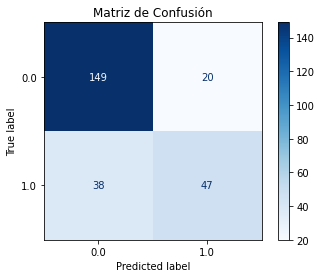

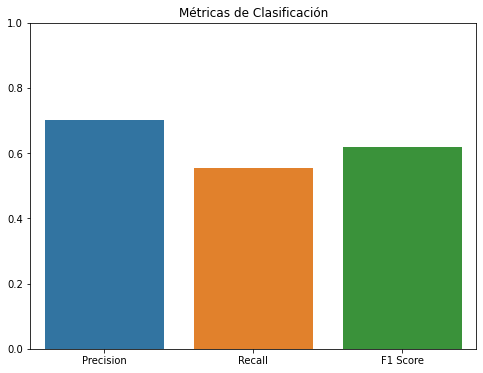

In [13]:
# import warnings
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn import model_selection
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import log_loss, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

warnings.filterwarnings('ignore')

# Cargar datos
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
dataframe = pd.read_csv(url)
dat = dataframe.values
X = dat[:, :-1]
y = dat[:, -1]
test_size = 0.33
seed = 7

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
model.fit(X_train, y_train)
pred = model.predict(X_test)

# Calcular métricas
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)

print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, pred)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

# Crear gráfico de barras para las métricas
metrics = {'Precision': precision, 'Recall': recall, 'F1 Score': f1}
names = list(metrics.keys())
values = list(metrics.values())

plt.figure(figsize=(8, 6))
sns.barplot(x=names, y=values)
plt.ylim(0, 1)
plt.title('Métricas de Clasificación')
plt.show()


Curva de características operativas del receptor

AUC - Test Set: 82.85%


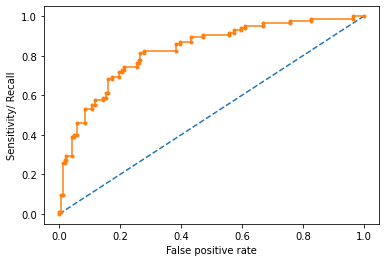

In [5]:
# import warnings
# import pandas
# from sklearn import model_selection
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import roc_auc_score, roc_curve

warnings.filterwarnings('ignore')

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
dataframe = pd.read_csv(url)
dat = dataframe.values
X = dat[:,:-1]
y = dat[:,-1]
seed = 7
#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
model.fit(X_train, y_train)

# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/ Recall')
# show the plot
plt.show()

Pérdida logaritmica 

Logloss: 0.48


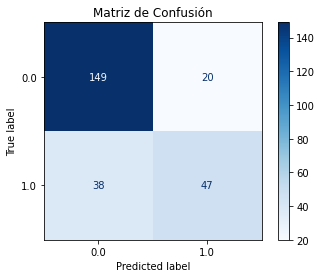

In [6]:
# #!pip install seaborn
# # Classification LogLoss
# import warnings
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn import model_selection
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import log_loss, confusion_matrix, ConfusionMatrixDisplay

# Ignorar advertencias
warnings.filterwarnings('ignore')

# Cargar datos
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
dataframe = pd.read_csv(url)
dat = dataframe.values
X = dat[:, :-1]
y = dat[:, -1]
seed = 7
test_size = 0.33

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Predecir y calcular logloss
pred_probs = model.predict_proba(X_test)[:, 1]
accuracy = log_loss(y_test, pred_probs)
print("Logloss: %.2f" % (accuracy))

# Predecir clases para la matriz de confusión
pred = model.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, pred)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()



Índice Jaccard

Jaccard Similarity Score : 0.375


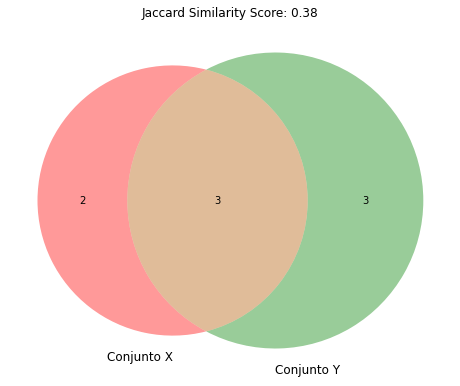

In [7]:
# #!pip install matplotlib_venn
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib_venn as venn

def compute_jaccard_similarity_score(x, y):
    intersection_cardinality = len(set(x).intersection(set(y)))
    union_cardinality = len(set(x).union(set(y)))
    return intersection_cardinality / float(union_cardinality)

# Conjuntos de ejemplo
x = np.array([0, 1, 2, 5, 6])
y = np.array([0, 2, 3, 5, 7, 9])

# Calcular el índice de similitud de Jaccard
score = compute_jaccard_similarity_score(x, y)
print("Jaccard Similarity Score : %s" % score)

# Crear conjuntos a partir de los arrays
set_x = set(x)
set_y = set(y)

# Crear un gráfico de Venn para visualizar la similitud
plt.figure(figsize=(8, 8))
venn.venn2([set_x, set_y], ('Conjunto X', 'Conjunto Y'))

# Añadir el resultado del índice de Jaccard al gráfico
plt.title(f"Jaccard Similarity Score: {score:.2f}")
plt.show()


Prueba de Bondad de Ajuste de Kolmogorov-Smirnov en una Muestra de Números Aleatorios

Números aleatorios generados:
[0.6722357123762264, 0.40028454032444005, 0.6685982343397938, 0.8037187974439911, 0.39307155803532645, 0.9622395198096231, 0.4152070751153759, 0.8572938108666674, 0.06395266486251039, 0.5685657274681256, 0.29046532394676383, 0.010765849586275245, 0.730423809141539, 0.19410792215459793, 0.9553210988579193, 0.25235053514034567, 0.845021072155865, 0.6325255953689507, 0.25411434559787816, 0.5737362265620729, 0.03600355789289422, 0.3698633054071271, 0.17273994559495165, 0.043261074142188605, 0.5128179370881784, 0.6278360621312089, 0.0240504733035114, 0.7658971980480936, 0.5334738887755707, 0.9732964124820861, 0.9400573628994949, 0.8148715318871794, 0.35349864873011416, 0.5752883114114726, 0.05652441842117961, 0.9637055437170609, 0.015280424803111758, 0.8161214441113755, 0.6980681437566626, 0.006835922879906087, 0.6468514889717527, 0.8202532849546889, 0.6901932802186143, 0.1477391045787, 0.5477410430048353, 0.5833564193096102, 0.03868760853797992, 0.804580210909

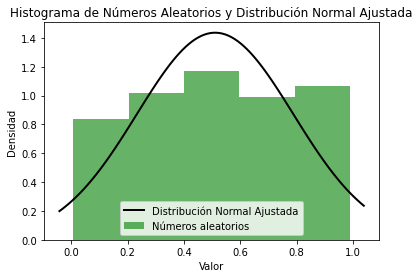

In [8]:
# import random
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import kstest, norm

# Generar 10 números aleatorios
N = 200
actual = [random.random() for _ in range(N)]

# Realizar la prueba de Kolmogorov-Smirnov
kstest_result = kstest(actual, 'norm')

# Mostrar resultados
print("Números aleatorios generados:")
print(actual)
print("\nResultado de la prueba de Kolmogorov-Smirnov:")
print(kstest_result)

# Crear un histograma de los números aleatorios generados
plt.hist(actual, bins=5, density=True, alpha=0.6, color='g', label='Números aleatorios')

# Generar una distribución normal para comparación
mu, std = norm.fit(actual)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# Graficar la distribución normal
plt.plot(x, p, 'k', linewidth=2, label='Distribución Normal Ajustada')
plt.legend(loc='best')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Histograma de Números Aleatorios y Distribución Normal Ajustada')
plt.show()


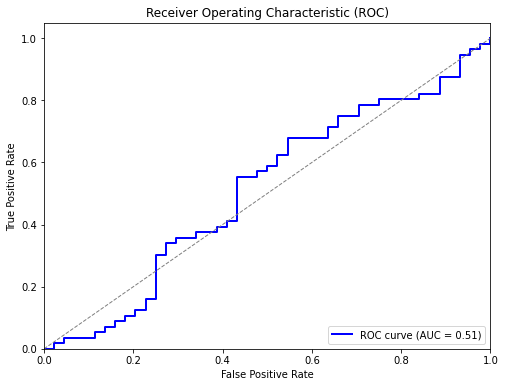

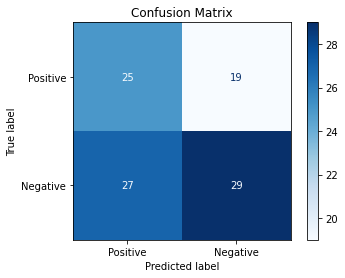

Accuracy: 0.54
Precision: 0.60
Recall: 0.52
F1 Score: 0.56
ROC AUC Score: 0.51


In [9]:

# Generar números aleatorios para simular las métricas de detección
np.random.seed(42)  # Para reproducibilidad
y_true = np.random.randint(0, 2, size=100)  # Valores verdaderos (0 o 1)
y_pred_proba = np.random.rand(100)  # Probabilidades predichas (entre 0 y 1)

# Establecer un umbral para la predicción binaria (0 o 1)
threshold = 0.5
y_pred = (y_pred_proba > threshold).astype(int)

# Calcular métricas de rendimiento
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred_proba)

# Visualizar la curva ROC
fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Visualizar la matriz de confusión
cm = confusion_matrix(y_true, y_pred)
labels = ['Positive', 'Negative']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Imprimir métricas de rendimiento
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')


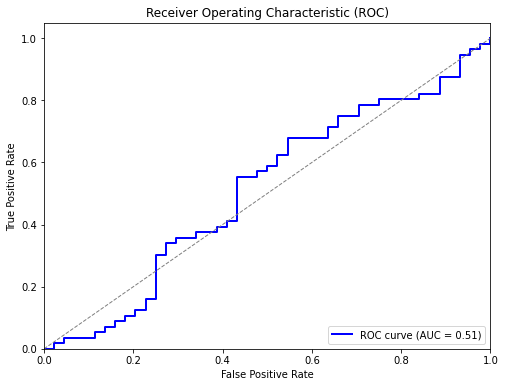

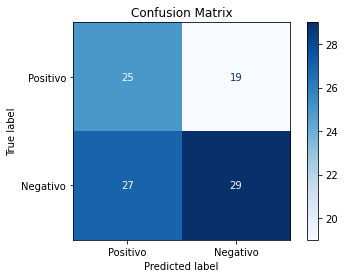

Accuracy: 0.54
Precision: 0.60
Recall: 0.52
F1 Score: 0.56
ROC AUC Score: 0.51


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay

# Generar números aleatorios para simular las métricas de detección
np.random.seed(42)  # Para reproducibilidad
y_true = np.random.randint(0, 2, size=100)  # Valores verdaderos (0 o 1)
y_pred_proba = np.random.rand(100)  # Probabilidades predichas (entre 0 y 1)

# Establecer un umbral para la predicción binaria (0 o 1)
threshold = 0.5
y_pred = (y_pred_proba > threshold).astype(int)

# Calcular métricas de rendimiento
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred_proba)

# Visualizar la curva ROC
fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Visualizar la matriz de confusión con etiquetas simplificadas
cm = confusion_matrix(y_true, y_pred)
labels = ['Positivo', 'Negativo']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Imprimir métricas de rendimiento
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')


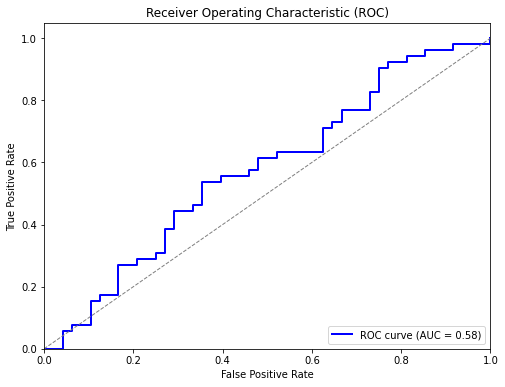

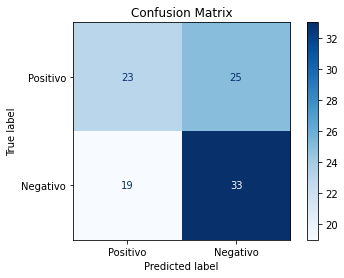

Accuracy: 0.56
Precision: 0.57
Recall: 0.63
F1 Score: 0.60
ROC AUC Score: 0.58


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay

# Generar números aleatorios para simular las métricas de detección
#np.random.seed(42)  # Para reproducibilidad
y_true = np.random.randint(0, 2, size=100)  # Valores verdaderos (0 o 1)
y_pred_proba = np.random.rand(100)  # Probabilidades predichas (entre 0 y 1)

# Establecer un umbral para la predicción binaria (0 o 1)
threshold = 0.5
y_pred = (y_pred_proba > threshold).astype(int)

# Calcular métricas de rendimiento
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred_proba)

# Visualizar la curva ROC
fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Visualizar la matriz de confusión con etiquetas estándar
cm = confusion_matrix(y_true, y_pred)
labels = ['Positivo', 'Negativo']  # Establecer etiquetas estándar
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Imprimir métricas de rendimiento
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')


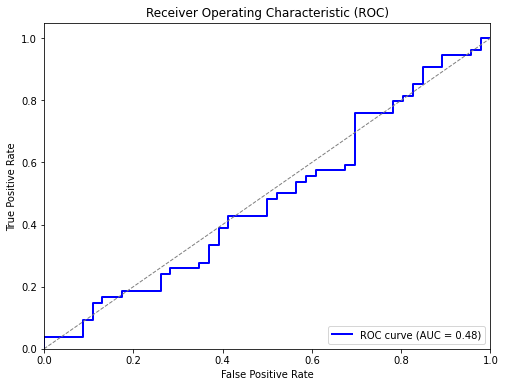

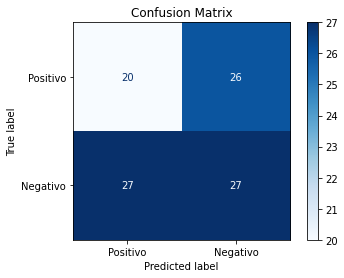

Log Loss: 1.05
Jaccard Score: 0.34
Kolmogorov-Smirnov Test Statistic: 0.50
Kolmogorov-Smirnov Test P-value: 0.00
Gini Coefficient: -0.04


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve,
                             log_loss, jaccard_score, confusion_matrix, ConfusionMatrixDisplay)
from scipy.stats import kstest, norm

# Generar números aleatorios para simular las métricas de detección
#np.random.seed(42)
y_true = np.random.randint(0, 2, size=100)  # Valores verdaderos (0 o 1)
y_pred_proba = np.random.rand(100)  # Probabilidades predichas (entre 0 y 1)

# Establecer un umbral para la predicción binaria (0 o 1)
threshold = 0.5
y_pred = (y_pred_proba > threshold).astype(int)

# Calcular métricas de rendimiento
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred_proba)
logloss = log_loss(y_true, y_pred_proba)
jaccard = jaccard_score(y_true, y_pred)

# Visualizar la curva ROC
fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Visualizar la matriz de confusión con etiquetas estándar
cm = confusion_matrix(y_true, y_pred)
labels = ['Positivo', 'Negativo']  # Establecer etiquetas estándar
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Gráfico de Pérdida Logarítmica
print(f'Log Loss: {logloss:.2f}')

# Índice de Jaccard
print(f'Jaccard Score: {jaccard:.2f}')

# Gráfico de Kolmogorov-Smirnov
ks_statistic, ks_pvalue = kstest(y_pred_proba, 'norm')
print(f'Kolmogorov-Smirnov Test Statistic: {ks_statistic:.2f}')
print(f'Kolmogorov-Smirnov Test P-value: {ks_pvalue:.2f}')

# Gráfico de Ganancia y Elevación (no implementado)

# Coeficiente de Gini
gini = 2 * roc_auc - 1
print(f'Gini Coefficient: {gini:.2f}')
